- Machine Learning Lab3
- Topic: PCA
- Student Name: Jyosna Philip
- Roll No: 19
- Date: 9th May '24
- Submission : 12th May '24

In [2]:
import pandas as pd
import numpy as np
from sklearn import svm
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
#importing support vector classifier
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.datasets import load_breast_cancer

C:\Users\jyosn\AppData\Local\Temp\ipykernel_9968\3067245190.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
# instantiating
cancer_X,cancer_y = load_breast_cancer(as_frame=True,return_X_y=True)

In [4]:
 # Input features
X = cancer_X
print('Inputs Dataframe shape   :', X.shape)
y=cancer_y

Inputs Dataframe shape   : (569, 30)


In [5]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [6]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
z_train=sc.fit_transform(X_train)
z_test=sc.transform(X_test)
n_components=2


In [7]:
clf=SVC(kernel='linear') #choosing linear classifier
clf.fit(z_train,y_train)   #training

SVC(kernel='linear')

In [9]:
y_pred=clf.predict(z_test)
y_pred_train=clf.predict(z_train)
print("Training Accuracy score: ",accuracy_score(y_pred_train,y_train))
print("Testing Accuracy score: ",accuracy_score(y_pred,y_test))

Training Accuracy score:  0.9868131868131869
Testing Accuracy score:  0.956140350877193


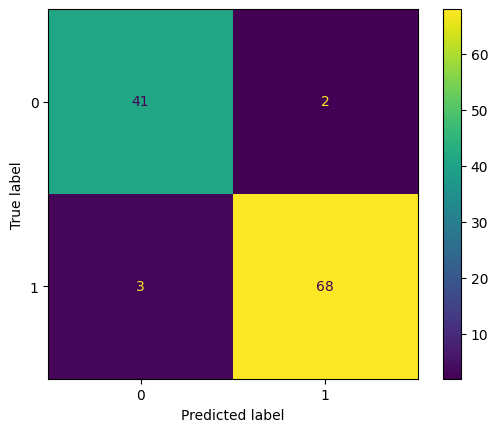

In [10]:
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix
cm=confusion_matrix(y_test,y_pred)
fig=ConfusionMatrixDisplay(cm,display_labels=clf.classes_)
fig.plot()

PCA

In [12]:
from sklearn.decomposition import PCA

In [14]:
pca = PCA(n_components = 2)
z_train = pca.fit_transform(z_train)
z_test = pca.transform(z_test)
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.69048978, 0.30951022])

In [16]:
clf1=SVC(kernel='linear') #choosing linear classifier
clf1.fit(z_train,y_train)

SVC(kernel='linear')

In [17]:
y_pred=clf1.predict(z_test)
y_pred_train=clf1.predict(z_train)
print("Training Accuracy score: ",accuracy_score(y_pred_train,y_train))
print("Testing Accuracy score: ",accuracy_score(y_pred,y_test))

Training Accuracy score:  0.945054945054945
Testing Accuracy score:  0.9912280701754386


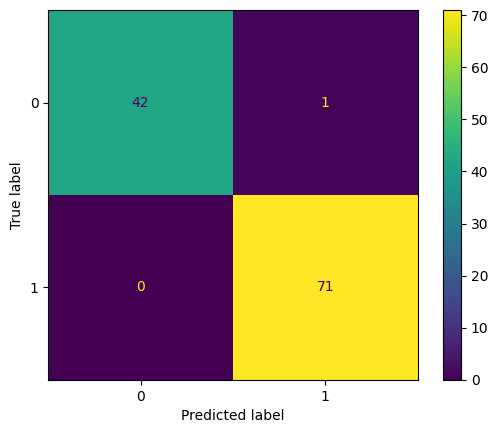

In [18]:
cm=confusion_matrix(y_test,y_pred)
fig=ConfusionMatrixDisplay(cm,display_labels=clf1.classes_)
fig.plot()

In [35]:
#create dataframe
df_train=pd.DataFrame(z_train,columns=["PC1","PC2"])
df_trainy=pd.DataFrame(y_train).reset_index().drop(columns=["index"])
df_train=pd.concat([df_train,df_trainy],axis=1)
df_train.head()

,PC1,PC2,target
0,4.244903,9.131428,1
1,9.053755,0.475310,0
2,-2.275374,3.278471,1
3,-2.510453,0.743743,1
4,-2.302848,2.665155,1


VISUALIZATION

In [37]:
def make_meshgrid(x, y, h=0.2):#0.02
    x_min, x_max = x.min() - 1, x.max() + 1
    '''calculates the minimum and maximum values in the x array 
    and adds/subtracts 1 to create a slightly extended range. 
    This ensures the entire data is covered in the grid.'''
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    '''arrange:create an array of evenly spaced values starting 
    from x_min (inclusive) and ending at x_max (exclusive) with a step size of h'''
    ''' takes two one-dimensional arrays and generates a two-dimensional grid of coordinates. 
    the first argument is the array of x-coord, and second argument is the array of y-coord. 
    The output xx (containing the x-coord of the grid) and yy (containing the y-coord of the grid).'''
    return xx, yy
def plot_contours(ax, clf, xx, yy, **params): #for plotting the contours
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out
'''ax: a Matplotlib axis object where the plot will be created.
xx, yy: which are the two-dimensional grids of x and y coordinates 
**params: This argument uses the double asterisk notation, indicating it can accept a variable number
 of keyword arguments. These arguments will be used to customize the contour plot.
clf.predict(...): This method likely takes the combined (flattened) x and y coordinates from the grids (xx.ravel() and yy.ravel())
predicts a value for each data point based on the classifier's model.
Z.reshape(xx.shape): Since xx and yy represent the grid structure, this line reshapes the one-dimensional prediction 
output Z back into a two-dimensional array with the same shape as the original grids xx and yy. 
This ensures the predicted values are correctly mapped to the corresponding points in the grid.
ax.contourf(...): This line utilizes the contourf method of the Matplotlib axis object (ax).
xx, yy: These are the two-dimensional grids containing the x and y coordinates for plotting the contours.
Z: This is the two-dimensional array containing the predicted values at each grid point. 
This array determines the height or elevation for the contour plot.
**params: The variable keyword arguments (**params) passed to the function are used to customize the appearance of the contour plot. 
These might include options like the number of contour lines, colormap, line styles, etc. 
out: This likely represents a Matplotlib contour object containing information about the plotted contours.
The function returns the out variable, which holds the Matplotlib contour object representing the generated filled contour plot.
 This allows you to potentially interact with the plot object further (e.g., adding labels, adjusting colors).
'''


"ax: a Matplotlib axis object where the plot will be created.\nxx, yy: which are the two-dimensional grids of x and y coordinates \n**params: This argument uses the double asterisk notation, indicating it can accept a variable number\n of keyword arguments. These arguments will be used to customize the contour plot.\nclf.predict(...): This method likely takes the combined (flattened) x and y coordinates from the grids (xx.ravel() and yy.ravel())\npredicts a value for each data point based on the classifier's model.\n\nZ.reshape(xx.shape): Since xx and yy represent the grid structure, this line reshapes the one-dimensional prediction \noutput Z back into a two-dimensional array with the same shape as the original grids xx and yy. \nThis ensures the predicted values are correctly mapped to the corresponding points in the grid.\n\nax.contourf(...): This line utilizes the contourf method of the Matplotlib axis object (ax).\nxx, yy: These are the two-dimensional grids containing the x and y

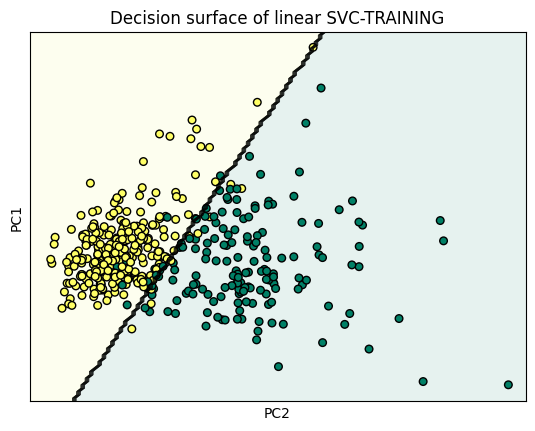

In [39]:
fig, ax = plt.subplots()
title = 'Decision surface of linear SVC-TRAINING'
X0, X1 = df_train.iloc[:, 0], df_train.iloc[:, 1]
xx, yy = make_meshgrid(X0, X1)
plot_contours(ax, clf1, xx, yy, cmap=plt.cm.summer, alpha=0.1)
ax.scatter(X0, X1, c=y_train, cmap=plt.cm.summer, s=30, edgecolors='k')
ax.set_ylabel('PC1')
ax.set_xlabel('PC2')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
# Plot decision boundary
Z = clf1.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
ax.contour(xx, yy, Z, colors='k', linewidths=0.5)

In [40]:
df_test=pd.DataFrame(z_test,columns=["PC1","PC2"])
df_testy=pd.DataFrame(y_test).reset_index().drop(columns=["index"])
df_test=pd.concat([df_test,df_testy],axis=1)
df_test.head()

,PC1,PC2,target
0,-0.738770,0.643906,1
1,2.681511,-4.410524,0
2,1.476499,-1.076575,0
3,-0.878278,2.440522,1
4,-1.640433,2.371707,1


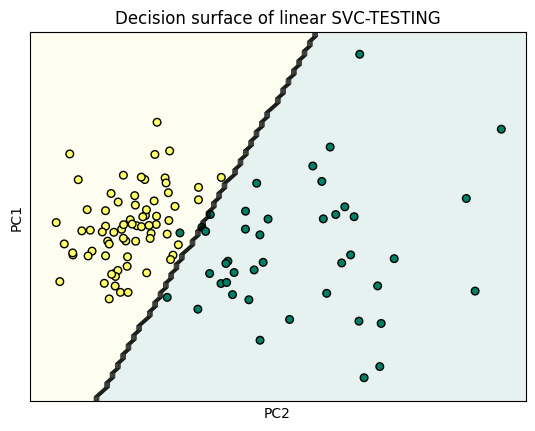

In [41]:
fig, ax = plt.subplots()
title = 'Decision surface of linear SVC-TESTING'
X0, X1 = df_test.iloc[:, 0], df_test.iloc[:, 1]
xx, yy = make_meshgrid(X0, X1)
plot_contours(ax, clf1, xx, yy, cmap=plt.cm.summer, alpha=0.1)
ax.scatter(X0, X1, c=y_test, cmap=plt.cm.summer, s=30, edgecolors='k')
ax.set_ylabel('PC1')
ax.set_xlabel('PC2')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
# Plot decision boundary
Z = clf1.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
ax.contour(xx, yy, Z, colors='k', linewidths=0.5)

PCA WITH RBF KERNEL

Training Accuracy score:  0.9340659340659341
Testing Accuracy score:  0.9649122807017544


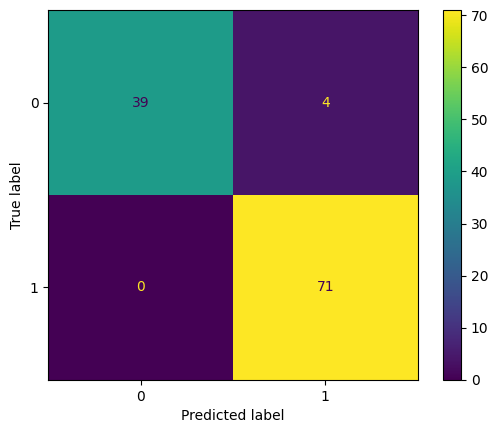

In [43]:
clf_r=SVC(kernel='rbf') #choosing linear classifier
clf_r.fit(z_train,y_train)
y_pred=clf_r.predict(z_test)
y_pred_train=clf_r.predict(z_train)
print("Training Accuracy score: ",accuracy_score(y_pred_train,y_train))
print("Testing Accuracy score: ",accuracy_score(y_pred,y_test))
cm=confusion_matrix(y_test,y_pred)
fig=ConfusionMatrixDisplay(cm,display_labels=clf_r.classes_)
fig.plot()

In [ ]:
fig, ax = plt.subplots()
title = 'Decision surface of RBF SVC-TRAINING'
X0, X1 = df_train.iloc[:, 0], df_train.iloc[:, 1]
xx, yy = make_meshgrid(X0, X1)
plot_contours(ax,clf_r , xx, yy, cmap=plt.cm.summer, alpha=0.1)
ax.scatter(X0, X1, c=y_train, cmap=plt.cm.summer, s=30, edgecolors='k')
ax.set_ylabel('PC1')
ax.set_xlabel('PC2')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
# Plot decision boundary
Z = clf_r.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
ax.contour(xx, yy, Z, colors='k', linewidths=0.5)


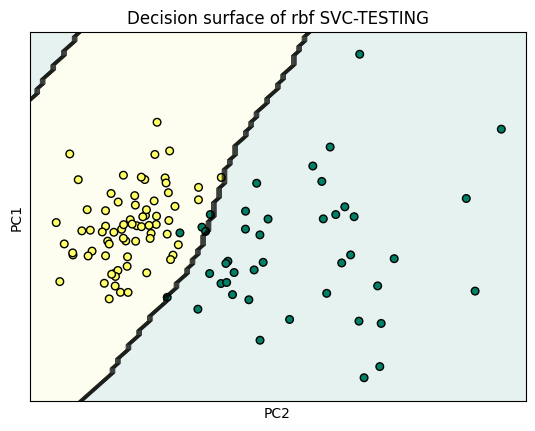

In [46]:
fig, ax = plt.subplots()
title = 'Decision surface of rbf SVC-TESTING'
X0, X1 = df_test.iloc[:, 0], df_test.iloc[:, 1]
xx, yy = make_meshgrid(X0, X1)
plot_contours(ax, clf_r, xx, yy, cmap=plt.cm.summer, alpha=0.1)
ax.scatter(X0, X1, c=y_test, cmap=plt.cm.summer, s=30, edgecolors='k')
ax.set_ylabel('PC1')
ax.set_xlabel('PC2')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
# Plot decision boundary
Z = clf_r.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
ax.contour(xx, yy, Z, colors='k', linewidths=0.5)

PCA WITH MULTIPLE COMPONENTS

In [51]:
sc=StandardScaler()
z_train=sc.fit_transform(X_train)
z_test=sc.transform(X_test)
pca = PCA(n_components = 4)
z_train = pca.fit_transform(z_train)
z_test = pca.transform(z_test)
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.43502782, 0.19500007, 0.09781519, 0.06486409])

Training Accuracy score:  0.9604395604395605
Testing Accuracy score:  0.9736842105263158


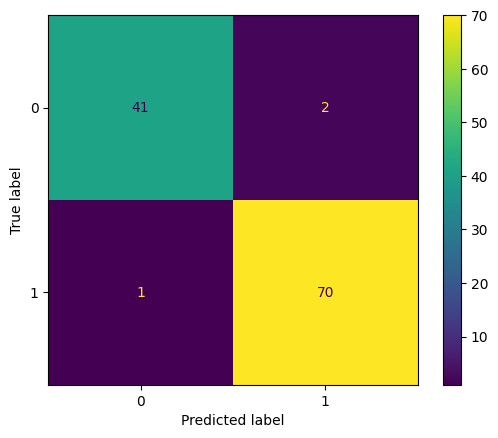

In [52]:
clf_4=SVC(kernel='linear') #choosing linear classifier
clf_4.fit(z_train,y_train)
y_pred=clf_4.predict(z_test)
y_pred_train=clf_4.predict(z_train)
print("Training Accuracy score: ",accuracy_score(y_pred_train,y_train))
print("Testing Accuracy score: ",accuracy_score(y_pred,y_test))
cm=confusion_matrix(y_test,y_pred)
fig=ConfusionMatrixDisplay(cm,display_labels=clf_4.classes_)
fig.plot()

Training Accuracy score:  0.9604395604395605
Testing Accuracy score:  0.9736842105263158


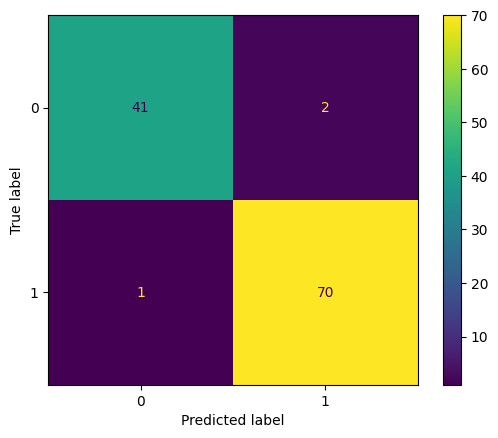

In [67]:
clf_4R=SVC(kernel="linear") #choosing linear classifier
clf_4R.fit(z_train,y_train)
y_pred=clf_4R.predict(z_test)
y_pred_train=clf_4R.predict(z_train)
print("Training Accuracy score: ",accuracy_score(y_pred_train,y_train))
print("Testing Accuracy score: ",accuracy_score(y_pred,y_test))
cm=confusion_matrix(y_test,y_pred)
fig=ConfusionMatrixDisplay(cm,display_labels=clf_4R.classes_)
fig.plot()